## 1. Data Understanding

In [2]:
# 1.1 Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as mn
import folium
import warnings
from sklearn.model_selection import ShuffleSplit
warnings.filterwarnings("ignore")

## 2. Data Preparation

### 2.1 Load and Clean Data

In [6]:
# Load the dataset
amsterdam_all = pd.read_csv(r"Data.csv")

# Rename the 'Unnamed: 0' column to 'Order'
amsterdam_all.rename(columns={'Unnamed: 0': 'Order'}, inplace=True)

# Display dataset information
print(f"Amsterdam Data shape = {amsterdam_all.shape}")
amsterdam_all.info()
amsterdam_all.sample(5)


Amsterdam Data shape = (2080, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2080 entries, 0 to 2079
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Order                       2080 non-null   int64  
 1   realSum                     2080 non-null   float64
 2   room_type                   2080 non-null   object 
 3   room_shared                 2080 non-null   bool   
 4   room_private                2080 non-null   bool   
 5   person_capacity             2080 non-null   int64  
 6   host_is_superhost           2080 non-null   bool   
 7   multi                       2080 non-null   int64  
 8   biz                         2080 non-null   int64  
 9   cleanliness_rating          2080 non-null   int64  
 10  guest_satisfaction_overall  2080 non-null   int64  
 11  bedrooms                    2080 non-null   int64  
 12  dist                        2080 non-null   float64
 13 

,Order,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,Weekend
200,200,381.037190,Private room,False,True,2,False,1,0,10,...,1,0.755334,0.448617,369.528486,19.566779,550.865834,38.385124,4.89400,52.38000,0
383,383,642.560870,Entire home/apt,False,False,4,False,0,0,10,...,2,1.785014,0.825262,726.600702,38.473990,540.672961,37.674870,4.87915,52.35965,0
27,27,295.034331,Private room,False,True,2,False,0,0,10,...,1,4.127280,0.839325,129.229700,6.842798,164.405009,11.455978,4.84631,52.34966,0
2008,2008,663.651489,Entire home/apt,False,False,3,False,0,0,10,...,0,0.319068,0.498613,520.395485,27.552558,827.887836,72.171946,4.89367,52.37608,1
663,663,356.431467,Entire home/apt,False,False,2,False,0,0,10,...,0,3.510244,0.872300,109.706087,5.809010,136.128217,9.485610,4.91960,52.40030,0


Order                         0
realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
Weekend                       0
dtype: int64


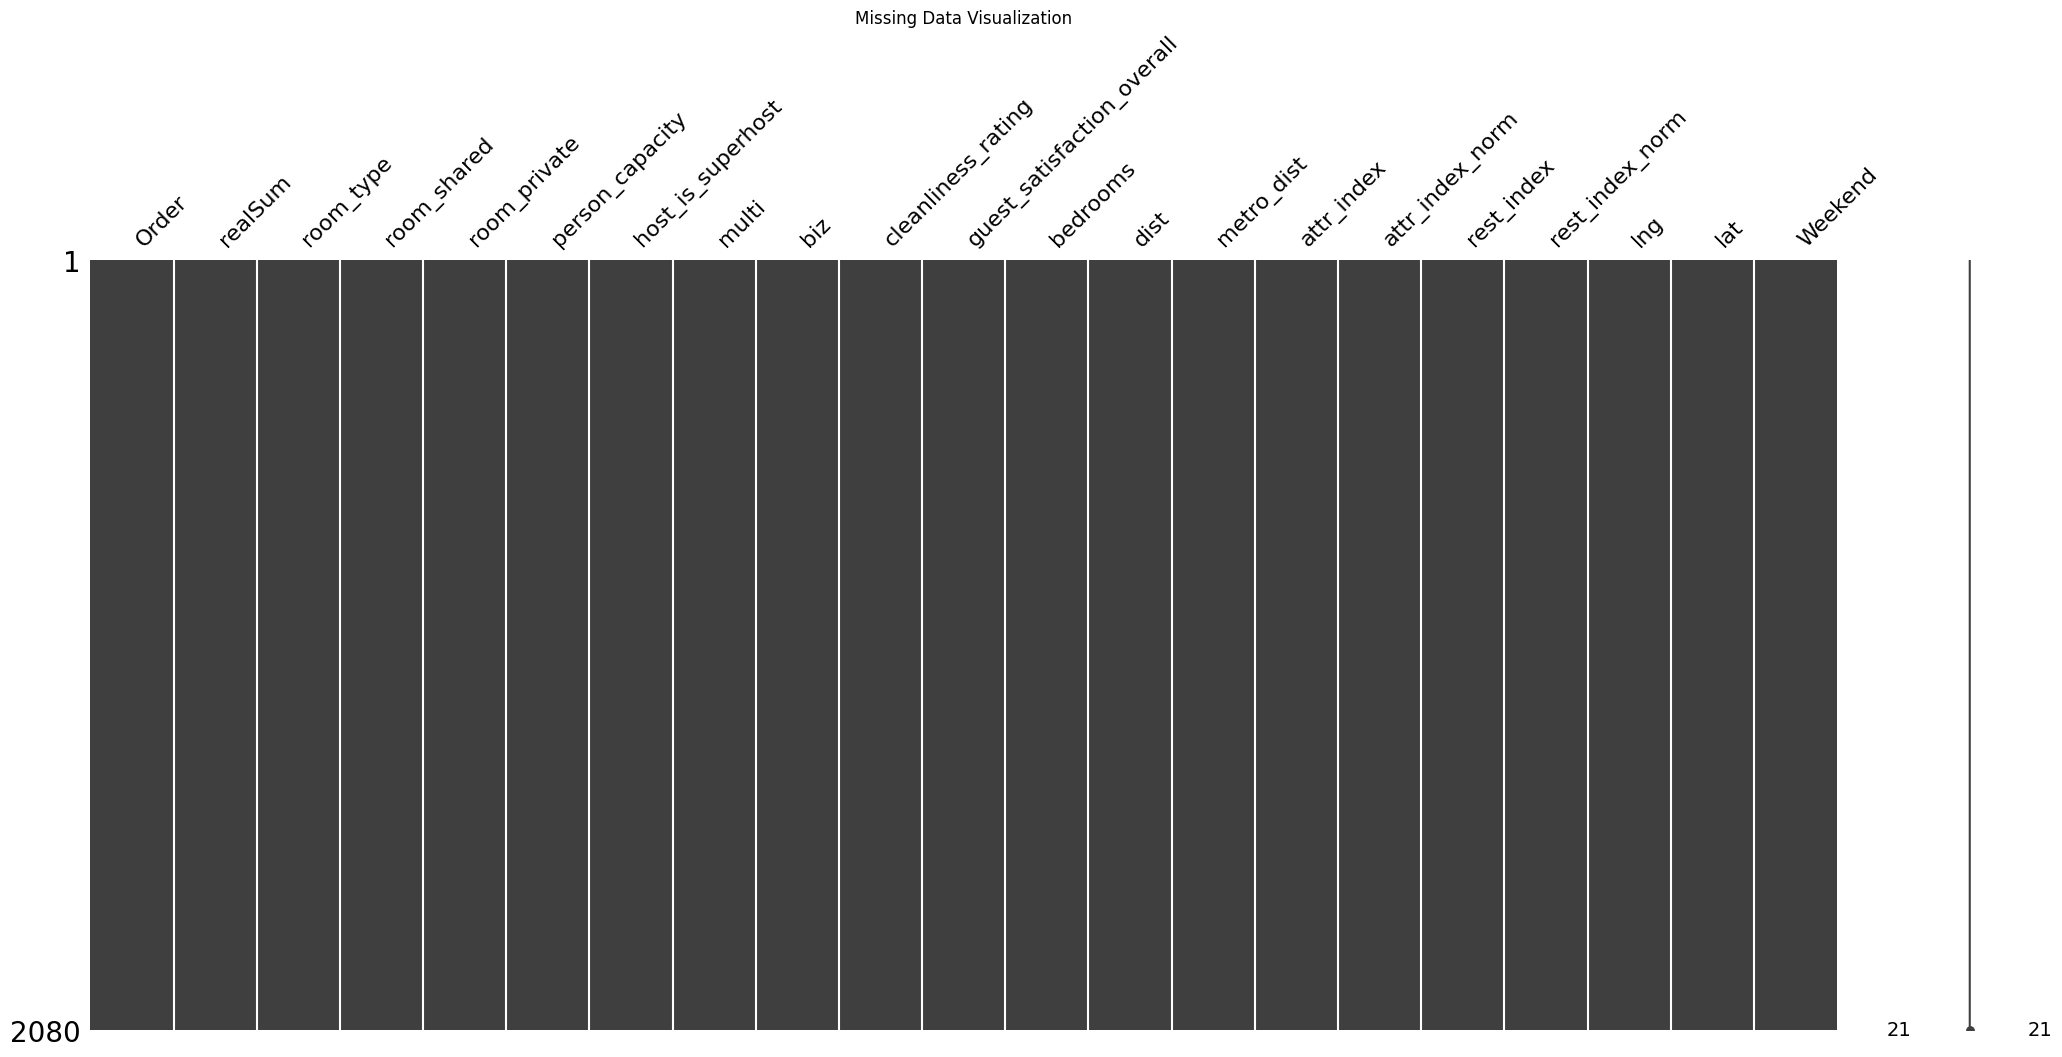

In [8]:
#### 2. Data Quality Check

# Check for missing values
missing_data = amsterdam_all.isnull().sum()
print(missing_data)

# Visualize missing data
mn.matrix(amsterdam_all)
plt.title("Missing Data Visualization")
plt.show()

# Confirm no missing values
assert amsterdam_all.isnull().sum().sum() == 0

## 3. Outlier Detection and Removal


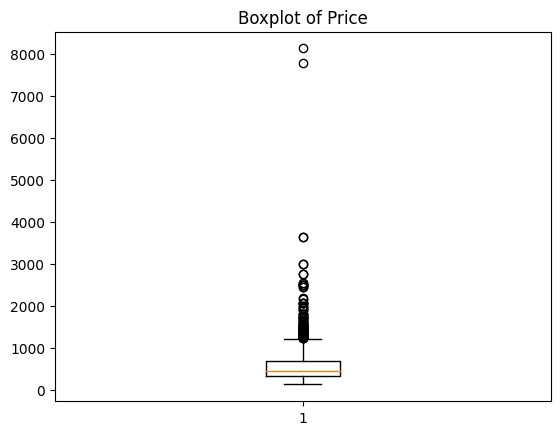

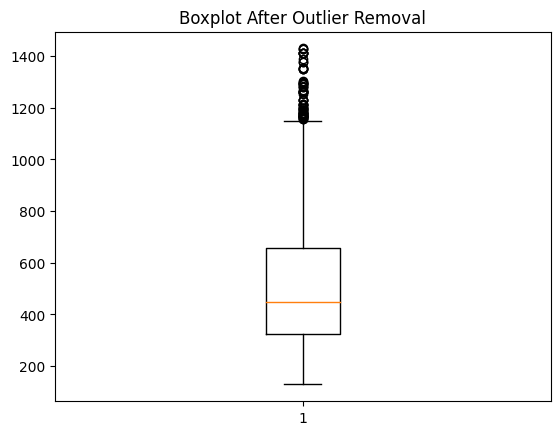

In [11]:
# Outlier detection in 'realSum'
price = amsterdam_all['realSum']
plt.boxplot(price)
plt.title("Boxplot of Price")
plt.show()

# Remove outliers using 2 standard deviations
mean_price = np.mean(price)
std_price = np.std(price)
threshold = 2
amsterdam_no_outliers = amsterdam_all[np.abs((price - mean_price) / std_price) < threshold]

# Reset index
amsterdam_no_outliers.reset_index(drop=True, inplace=True)

# Visualize after removing outliers
plt.boxplot(amsterdam_no_outliers['realSum'])
plt.title("Boxplot After Outlier Removal")
plt.show()


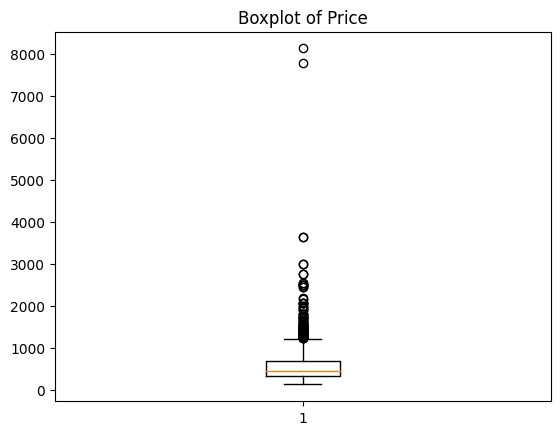

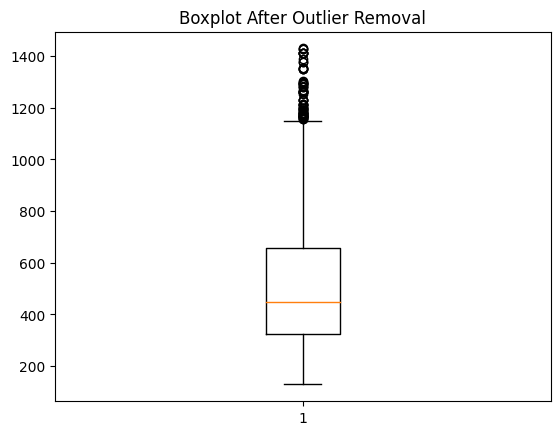

In [13]:
#### 3. Outlier Detection and Removal

# Outlier detection in 'realSum'
price = amsterdam_all['realSum']
plt.boxplot(price)
plt.title("Boxplot of Price")
plt.show()

# Remove outliers using 2 standard deviations
mean_price = np.mean(price)
std_price = np.std(price)
threshold = 2
amsterdam_no_outliers = amsterdam_all[np.abs((price - mean_price) / std_price) < threshold]

# Reset index
amsterdam_no_outliers.reset_index(drop=True, inplace=True)

# Visualize after removing outliers
plt.boxplot(amsterdam_no_outliers['realSum'])
plt.title("Boxplot After Outlier Removal")
plt.show()

* Outliers are removed to ensure that the dataset better represents typical Airbnb listings, reducing the potential bias caused by extreme values.

## 4. Independent Variable Analysis: Categories and Characteristics


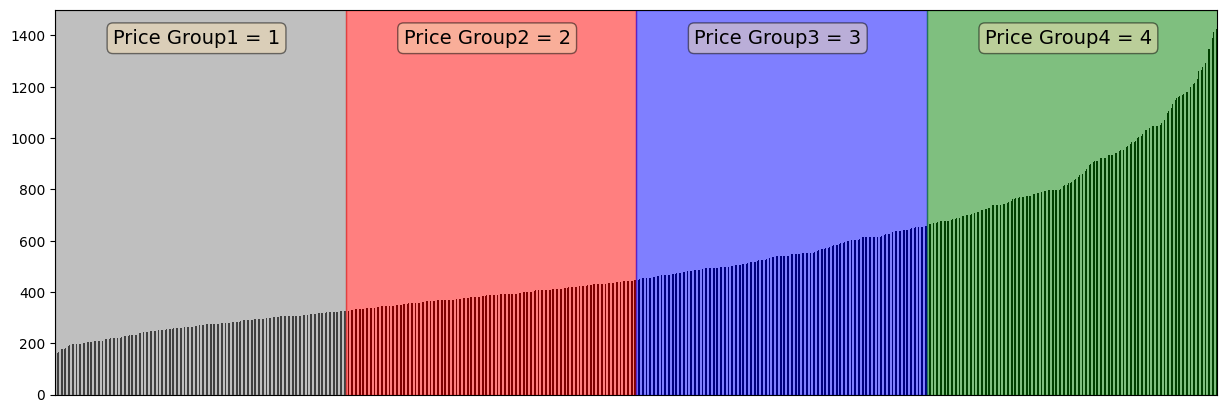

In [17]:
# Categorize 'realSum' into four groups
amsterdam_no_outliers['label'] = pd.qcut(amsterdam_no_outliers['realSum'], q=4, labels=[0, 1, 2, 3])
amsterdam_no_outliers['label'] = amsterdam_no_outliers['label'].astype(int)

# Visualize price categories
price = amsterdam_no_outliers['realSum'].sort_values()
price_plot = price.plot.bar(rot=90, color='black', figsize=(15, 5))
price_plot.xaxis.set_visible(False)
price_points = len(price)
price_plot.axvspan(0, round(price_points / 4), color='gray', alpha=0.5)
price_plot.axvspan(round(price_points / 4), round(2 * price_points / 4), color='red', alpha=0.5)
price_plot.axvspan(round(2 * price_points / 4), round(3 * price_points / 4), color='blue', alpha=0.5)
price_plot.axvspan(round(3 * price_points / 4), price_points, color='green', alpha=0.5)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
price_plot.text(0.05, 0.95, "Price Group1 = 1", transform=price_plot.transAxes, fontsize=14, verticalalignment='top', bbox=props)
price_plot.text(0.30, 0.95, "Price Group2 = 2", transform=price_plot.transAxes, fontsize=14, verticalalignment='top', bbox=props)
price_plot.text(0.55, 0.95, "Price Group3 = 3", transform=price_plot.transAxes, fontsize=14, verticalalignment='top', bbox=props)
price_plot.text(0.80, 0.95, "Price Group4 = 4", transform=price_plot.transAxes, fontsize=14, verticalalignment='top', bbox=props)
plt.show()

*  The dataset is prepared for classification tasks by transforming the continuous price variable into discrete categories.

## 5. Final Dataset Preparation


In [21]:
# Save final dataset
final_data = amsterdam_no_outliers.copy()

# Remove redundant columns
final_data.drop(columns=['room_shared', 'room_private'], inplace=True)

# Display final dataset information
print(final_data.info())
final_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013 entries, 0 to 2012
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Order                       2013 non-null   int64  
 1   realSum                     2013 non-null   float64
 2   room_type                   2013 non-null   object 
 3   person_capacity             2013 non-null   int64  
 4   host_is_superhost           2013 non-null   bool   
 5   multi                       2013 non-null   int64  
 6   biz                         2013 non-null   int64  
 7   cleanliness_rating          2013 non-null   int64  
 8   guest_satisfaction_overall  2013 non-null   int64  
 9   bedrooms                    2013 non-null   int64  
 10  dist                        2013 non-null   float64
 11  metro_dist                  2013 non-null   float64
 12  attr_index                  2013 non-null   float64
 13  attr_index_norm             2013 

,Order,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,Weekend,label
count,2013.000000,2013.000000,2013.000000,2013.00000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000
mean,1037.525584,522.252489,2.729757,0.28465,0.106806,9.460010,94.394933,1.252360,2.874261,1.102613,262.412868,13.894300,329.547368,25.597518,4.890493,52.364469,0.467462,1.496771
std,599.837745,259.580150,0.985730,0.45136,0.308943,0.819139,6.398272,0.688517,2.094326,0.836096,186.578398,9.879020,224.286117,17.513464,0.039313,0.019067,0.499064,1.118974
min,0.000000,128.887118,2.000000,0.00000,0.000000,2.000000,20.000000,0.000000,0.015045,0.036517,40.890060,2.164941,50.823991,3.545205,4.775500,52.290310,0.000000,0.000000
25%,521.000000,325.732899,2.000000,0.00000,0.000000,9.000000,92.000000,1.000000,1.375187,0.476736,128.228827,6.789129,163.348976,12.592682,4.869800,52.354370,0.000000,0.000000
50%,1031.000000,447.589811,2.000000,0.00000,0.000000,10.000000,96.000000,1.000000,2.379145,0.876152,202.709849,10.733560,253.219237,20.179492,4.889140,52.365180,0.000000,1.000000
75%,1560.000000,657.324303,4.000000,1.00000,0.000000,10.000000,98.000000,2.000000,3.673035,1.513884,367.627857,19.466139,442.814944,34.551617,4.907370,52.375240,1.000000,2.000000
max,2079.000000,1429.240972,6.000000,1.00000,1.000000,10.000000,100.000000,5.000000,11.195932,4.411915,1888.737455,100.000000,1435.102401,100.000000,5.010770,52.423480,1.000000,3.000000


* The dataset is cleaned and streamlined, containing only the necessary columns for further analysis.

## 6. Visualizing Data Clusters on Map


In [25]:
#### 6. Visualizing Data Clusters on Map

# Create map centered on the mean of latitude and longitude
map_center = [final_data['lat'].mean(), final_data['lng'].mean()]
m = folium.Map(location=map_center, zoom_start=11.5)

# Define colors for each label
colors = {0: 'gray', 1: 'red', 2: 'blue', 3: 'green'}

# Add data points to map
for _, row in final_data.iterrows():
    folium.CircleMarker(
        [row['lat'], row['lng']], radius=1.5, color=colors[row['label']], fill=True, fill_color=colors[row['label']]
    ).add_to(m)

# Add legend
legend_html = '''
     <div style="position: fixed; 
                 bottom: 50px; left: 50px; width: 150px; height: 120px; 
                 border:2px solid grey; z-index:9999; font-size:14px;
                 background-color: #FFFFFF;
                ">&nbsp; Legend <br>
                  &nbsp; Label 0 &nbsp; <svg height="10" width="10">
                      <circle cx="5" cy="5" r="4" fill="gray" />
                    </svg><br>
                  &nbsp; Label 1 &nbsp; <svg height="10" width="10">
                      <circle cx="5" cy="5" r="4" fill="red" />
                    </svg><br>
                  &nbsp; Label 2 &nbsp; <svg height="10" width="10">
                      <circle cx="5" cy="5" r="4" fill="blue" />
                    </svg><br>
                  &nbsp; Label 3 &nbsp; <svg height="10" width="10">
                      <circle cx="5" cy="5" r="4" fill="green" />
                    </svg>
    </div>
    '''
m.get_root().html.add_child(folium.Element(legend_html))

# Display the map
m


* Based on the map, we can see that there are several clusters of data points spread across the area. The map can be useful for identifying patterns and trends in the data. For example, we can see that most of the blue points and red points are located in the city center. This is mainly due to the feature 'dist' which it seems to have correlation with the price of the Airbnb listing.

## 7. Feature Selection and Correlation Analysis


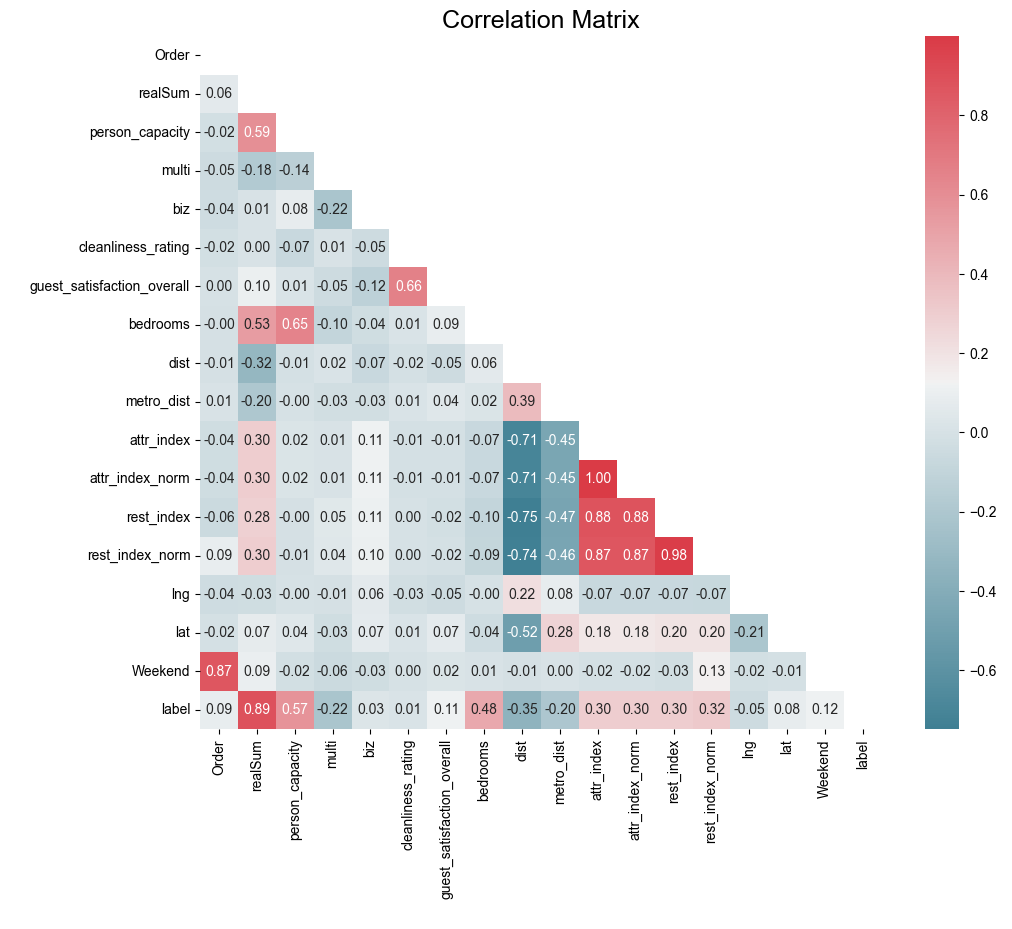

In [29]:
# Select numeric columns only for correlation analysis
numeric_columns = final_data.select_dtypes(include=[np.number])

# Calculate the correlation matrix for the numerical columns of final_data
corr_matrix = numeric_columns.corr()

# Set the size of the heatmap figure
plt.figure(figsize=(11, 9))

# Create a matrix of zeros with the same shape as the correlation matrix and mark the upper triangular part as True (to hide duplicate values)
dropSelf = np.zeros_like(corr_matrix, dtype=bool)
dropSelf[np.triu_indices_from(dropSelf)] = True

# Create a heatmap with the correlation matrix, using a diverging color palette and annotating the numerical values on the heatmap
sns.heatmap(corr_matrix, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=dropSelf)

# Set the font scale of the heatmap
sns.set(font_scale=1.5)
plt.title("Correlation Matrix")
plt.show()

# Drop low-correlation features
columns_to_drop = ['biz', 'cleanliness_rating', 'lng', 'lat', 'bedrooms']
final_data.drop(columns=[col for col in columns_to_drop if col in final_data.columns], inplace=True)


## 8. Dataset Encoding and Normalization


In [32]:
# Convert categorical data to numerical using one-hot encoding
df = pd.get_dummies(final_data)

# Normalize the data
Data_To_Normalize = ['dist', 'metro_dist', 'guest_satisfaction_overall']
df[Data_To_Normalize] = (df[Data_To_Normalize] - df[Data_To_Normalize].mean()) / df[Data_To_Normalize].std()

# Extract label values
Label = final_data['label'].to_numpy()

# Select relevant feature types
Feature_Type = ['person_capacity', 'multi', 'guest_satisfaction_overall', 'dist', 'metro_dist', 'attr_index_norm', 'rest_index_norm', 'Weekend']

# Extract selected features and convert to numpy array
Features = df[Feature_Type].to_numpy()


* Normalized and encoded data ensures features contribute equally to machine learning models, avoiding biases due to differing scales.

## 9. Splitting Dataset


Training set size: 1610, Testing set size: 403
Training set size: 1610, Testing set size: 403
Training set size: 1610, Testing set size: 403
Training set size: 1610, Testing set size: 403
Training set size: 1610, Testing set size: 403


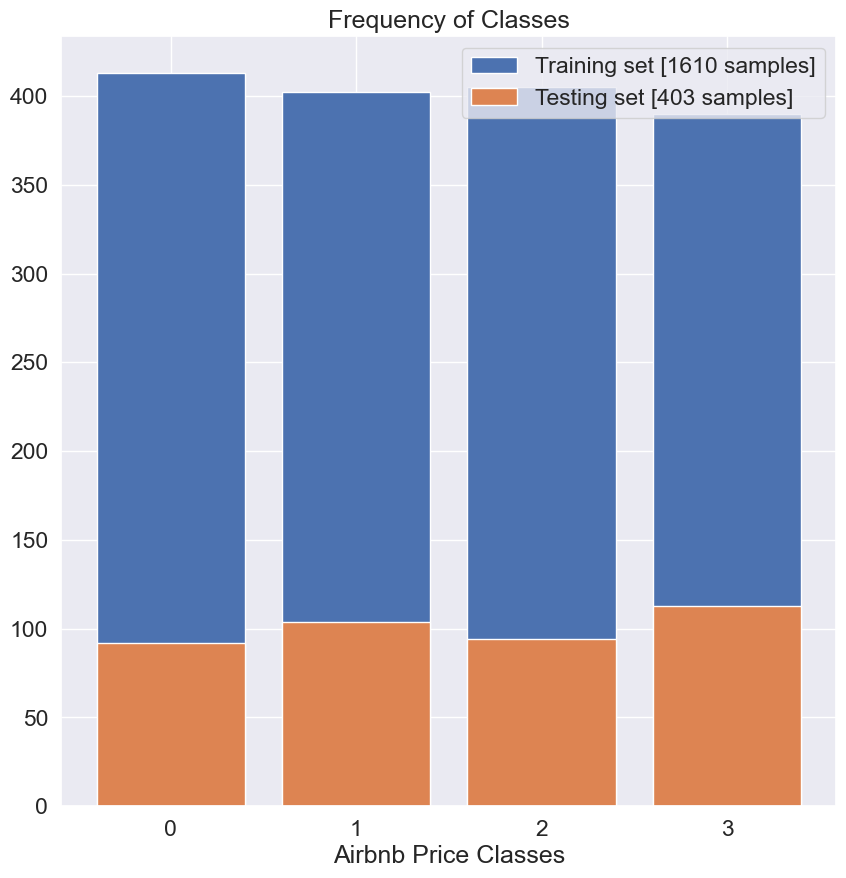

In [38]:
Cross_Validation_N = 5
cv = ShuffleSplit(n_splits=Cross_Validation_N, test_size=0.2, random_state=42)

for train_indices, test_indices in cv.split(Features, Label):
    X_train, X_test = Features[train_indices], Features[test_indices]
    y_train, y_test = Label[train_indices], Label[test_indices]

    print(f"Training set size: {len(y_train)}, Testing set size: {len(y_test)}")

# Plot label distribution
plt.figure(figsize=(10, 10))

unique_train, counts_train = np.unique(y_train, return_counts=True)
plt.bar(unique_train, counts_train, label=f'Training set [{len(y_train)} samples]')

unique_test, counts_test = np.unique(y_test, return_counts=True)
plt.bar(unique_test, counts_test, label=f'Testing set [{len(y_test)} samples]')

plt.xticks([0, 1, 2, 3])
plt.title('Frequency of Classes')
plt.xlabel('Airbnb Price Classes')
plt.legend()
plt.show()

* Training and testing datasets are prepared for model development, ensuring balanced representation across price categories.